In [1]:
# For organizational purposes I have decided to create a new notebook and copy everything done in the previous labs

# Start of Lab 3

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

lab3_df = pd.read_csv('C:/Users/joana/Ironhack/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')

lab3_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
lab3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
lab3_df.describe(include=[object]).T

,count,unique,top,freq
Customer,9134,9134,ZP64637,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

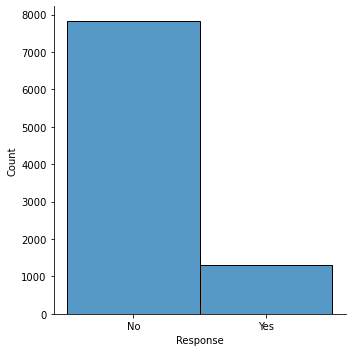

In [7]:
sns.displot(lab3_df['Response'], bins=60)
plt.show()

# As seen below, the overwhelming majority of people contacted did not respond
# The total number of responses is just above 1000 out of a possible ~10000 contacted people, so around 1/10th

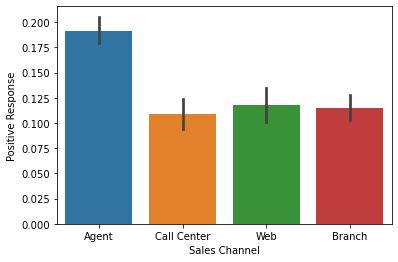

In [8]:
for i in lab3_df['Sales Channel']:
    lab3_df['Sales Channel']=lab3_df['Sales Channel'].astype(str)
    
lab3_df['Positive Response'] = [1 if x =='Yes' else 0 for x in lab3_df['Response']]

sns.barplot(x="Sales Channel", y="Positive Response", data=lab3_df)
plt.show()
    
# We can see below that the most positive responses were garnered when people were contacted by an Agent

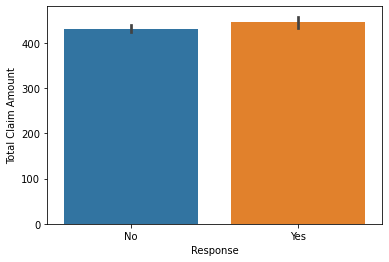

In [9]:
sns.barplot(x="Response", y="Total Claim Amount", data=lab3_df)
plt.show()

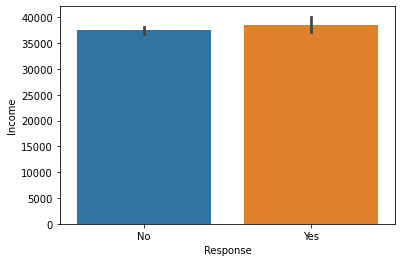

In [10]:
sns.barplot(x="Response", y="Income", data=lab3_df)
plt.show()

# Start of Lab 4

In [11]:
# Checking Data Types

lab3_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Positive Respons

In [12]:
# Splitting OG Dataframe into Numericals and Categoricals

# numericals = lab3_df[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount', 'Positive Response']].copy()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericals = lab3_df.select_dtypes(include=numerics)

categoricals = lab3_df.select_dtypes(include=object)


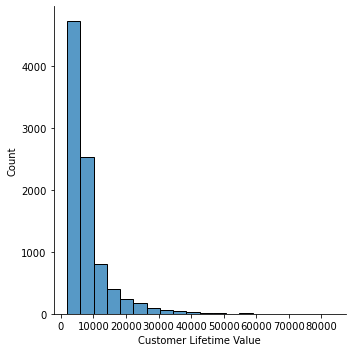

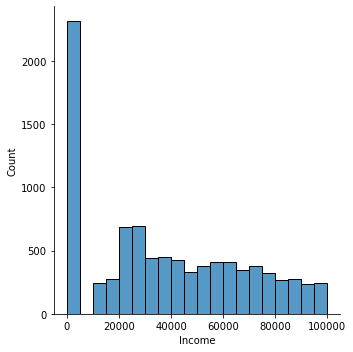

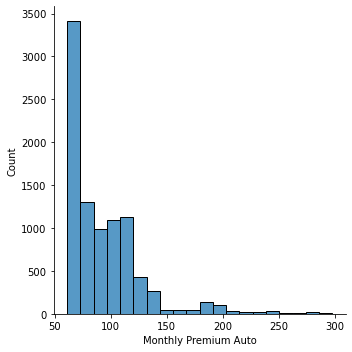

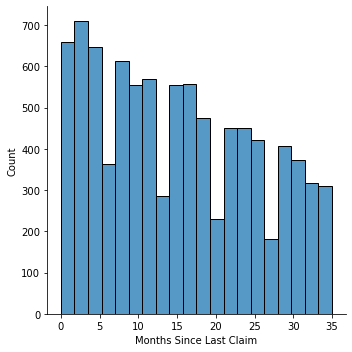

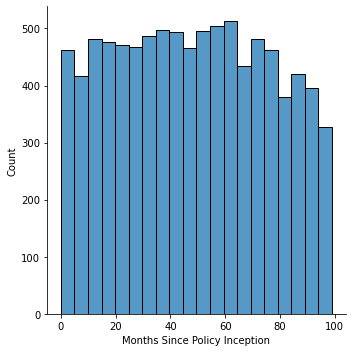

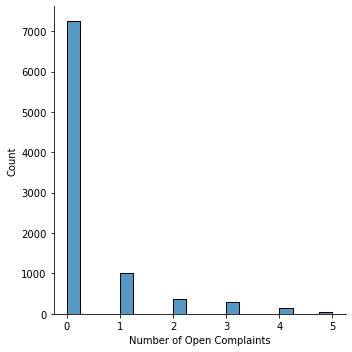

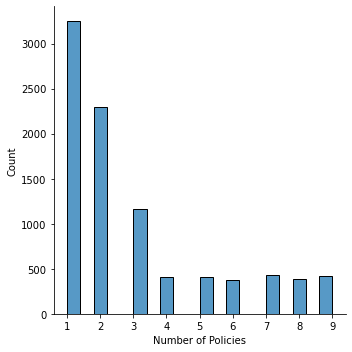

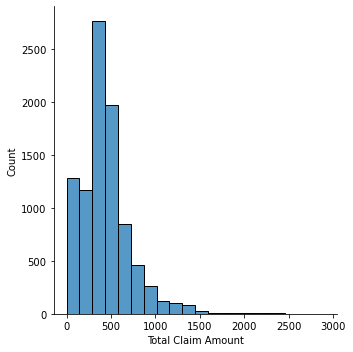

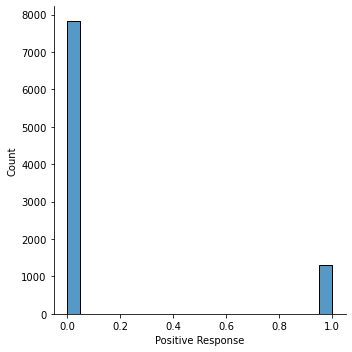

In [13]:
# Checking Normality through distribution graphs

for column in numericals.columns:
    sns.displot(numericals[column], bins=20)
    plt.show()

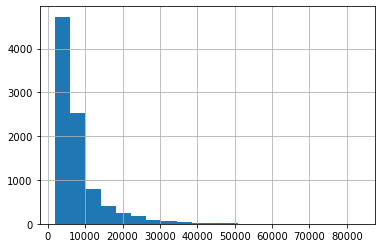

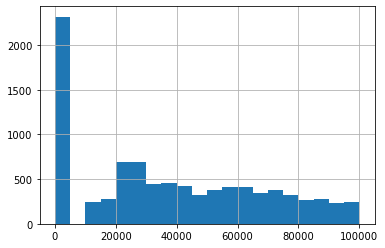

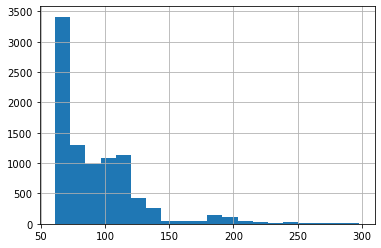

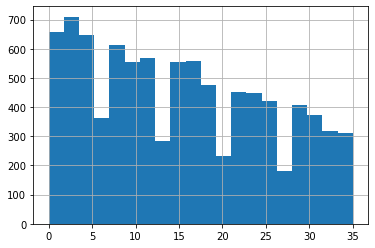

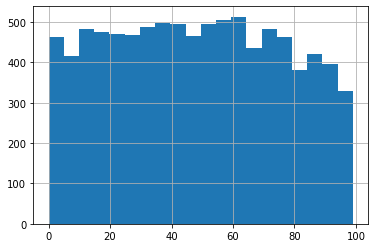

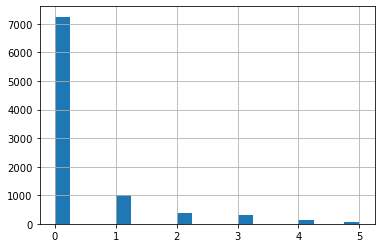

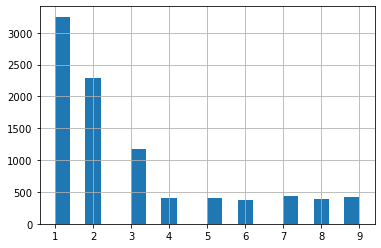

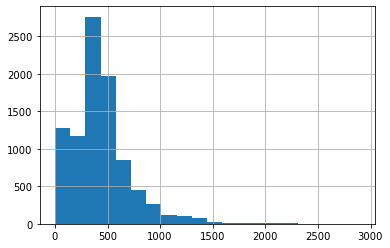

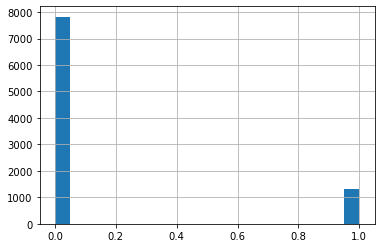

In [14]:
# Checking Normality through Histograms

for column in numericals.columns:
    numericals[column].hist(bins=20)
    plt.show()

In [15]:
# None look like standard normal distributions

# Customer Lifetime Value - exponential distribution (?)
# Income - Possible uniform distribution with an initial peak
# Monthly Premium Auto - Possible binomial distribution
# Months Since Last Premium - Possible Binomial distribution with outliers
# Months Since Policy Inception - Apparent Uniform distribution
# Number of Open Complaints - Exponential distribution
# Number of Policies - Exponential distribution
# Total Claim Amount - Possibly Binomial or Exponential distribution
# Positive Response (column created by me in lab3) - Bernoulli Distribution

In [16]:
# Checking Correlations and Multilinearity of the data

correlations_matrix = numericals.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Positive Response
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
Positive Response,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


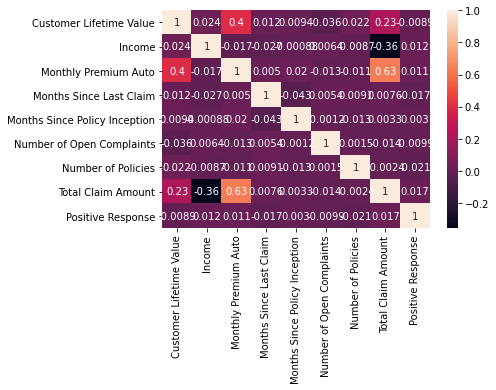

In [17]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [18]:
# There are no values with a correlation >= 0.9, the biggest correlation is 0.63
# It makes no sense to drop any columns in this case, because we would lose important information for our analysis

# Start of Lab 5

In [19]:
# X-y Split

y = numericals['Total Claim Amount']
X = numericals.drop(['Total Claim Amount'], axis=1)

print(y)
print(X)

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64
      Customer Lifetime Value  Income  Monthly Premium Auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866   

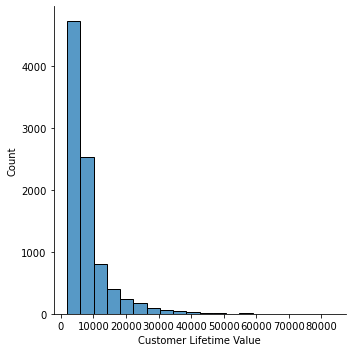

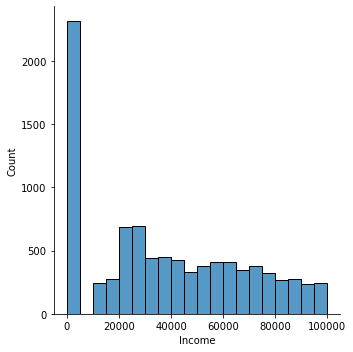

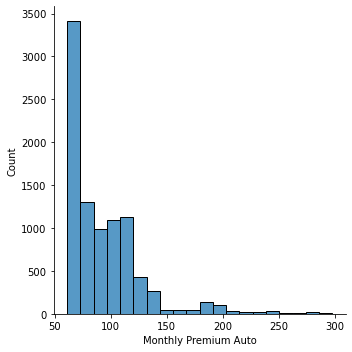

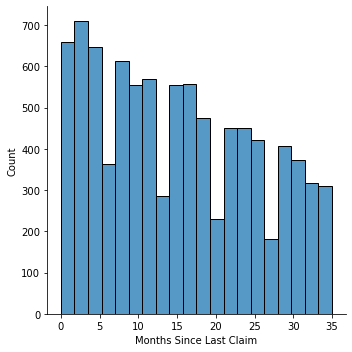

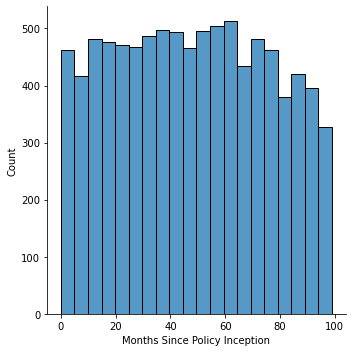

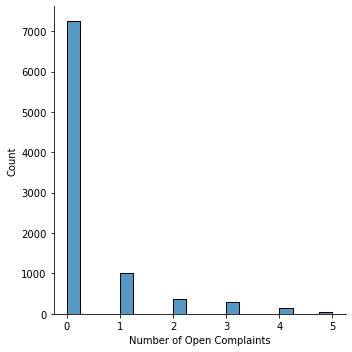

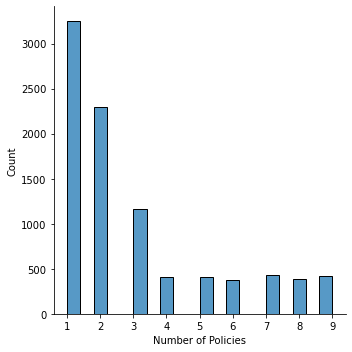

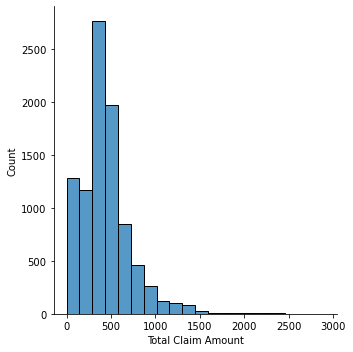

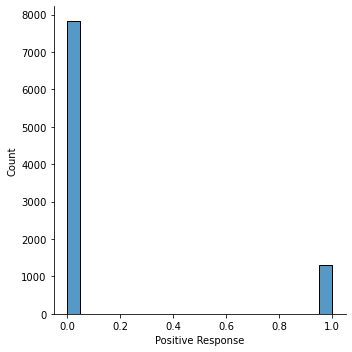

In [20]:
# Before I normalize, I want to visualize the scales I'm working with

for column in numericals.columns:
    sns.displot(numericals[column], bins=20)
    plt.show()


In [21]:
# Normalizing the data

# I've decided to normalize the columns below using the MinMaxScaler:
# Customer Lifetime Value
# Months Since Last Claim
# Months Since Policy Inception
# Number of Open Complaints
# Number of Policies
# Total Claim Amount

# And the rest, listed below, using the StandardScaler:
# Income
# Monthly Premium Auto

# I am ommiting the column "Positive Response" from this process because it is by nature already normalized

# Before normalizing, for automization's sake, I'm going to split my Dataframe into two separate ones - depending on
# the Scaler I will be applying

# minmaxset = lab3_df[['Customer Lifetime Value', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']].copy()
# stdset = lab3_df[['Income', 'Monthly Premium Auto']].copy()

In [22]:
# import sklearn
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# # Normalizing data: MINMAXSCALER
# minmaxnorm = MinMaxScaler().fit(minmaxset)
# x_norm = minmaxnorm.transform(minmaxset)
# print(x_norm.shape)
# minmax_df=pd.DataFrame(x_norm, columns=minmaxset.columns)
# minmax_df

# # Normalizing data: STANDARDSCALER
# standardnorm = StandardScaler().fit(stdset)
# x_st = standardnorm.transform(stdset)
# print(x_st.shape)
# stnorm_df = pd.DataFrame(x_st, columns=stdset.columns)
# stnorm_df

In [23]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# # ONLY MINMAXSCALER
# minmaxset = lab3_df[['Customer Lifetime Value', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount','Income', 'Monthly Premium Auto']].copy()

# # Normalizing data: MINMAXSCALER
# minmaxnorm = MinMaxScaler().fit(minmaxset)
# x_norm = minmaxnorm.transform(minmaxset)
# print(x_norm.shape)
# minmax_df=pd.DataFrame(x_norm, columns=minmaxset.columns)
# minmax_df


# ONLY STANDARDSCALER
stdset = lab3_df[['Customer Lifetime Value', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount','Income', 'Monthly Premium Auto']].copy()

# Normalizing data: STANDARDSCALER
standardnorm = StandardScaler().fit(stdset)
x_st = standardnorm.transform(stdset)
print(x_st.shape)
stnorm_df = pd.DataFrame(x_st, columns=stdset.columns)
stnorm_df

(9134, 8)


,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Income,Monthly Premium Auto
0,-0.762878,1.678099,-1.543287,-0.422250,-0.822648,-0.169640,0.612827,-0.703925
1,-0.149245,-0.208186,-0.217334,-0.422250,2.106160,2.400737,-1.239617,0.022691
2,0.710636,0.288205,-0.360680,-0.422250,-0.404247,0.455734,0.365710,0.429596
3,-0.052263,0.288205,0.606907,-0.422250,1.687759,0.329769,-1.239617,0.371467
4,-0.755575,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843,0.203390,-0.587666
...,...,...,...,...,...,...,...,...
9129,2.241590,0.288205,1.466984,-0.422250,-0.404247,-0.811934,1.128558,-0.587666
9130,-0.714411,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956,-0.528450,-0.413278
9131,0.023135,-0.605299,-0.396517,2.873245,-0.404247,1.227937,-1.239617,-0.238891
9132,-0.069935,1.876656,-1.614960,-0.422250,0.014154,0.885113,-0.517356,0.080820


In [24]:
# # Checking the visuals after normalization (minmaxset)

# for column in minmax_df.columns:
#     sns.displot(minmax_df[column], bins=20)
#     plt.show()

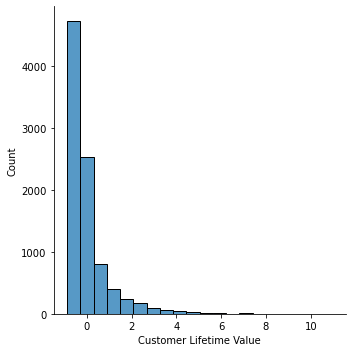

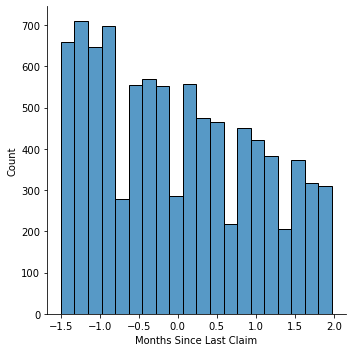

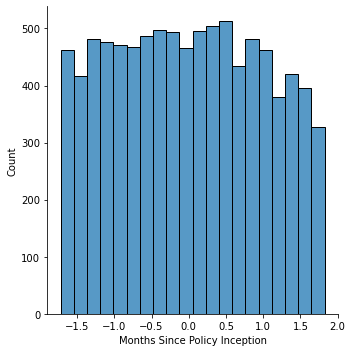

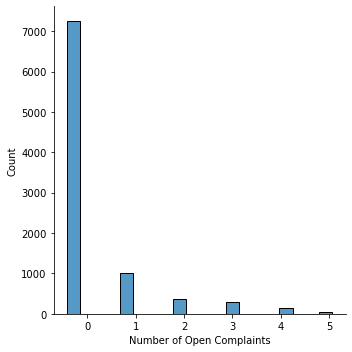

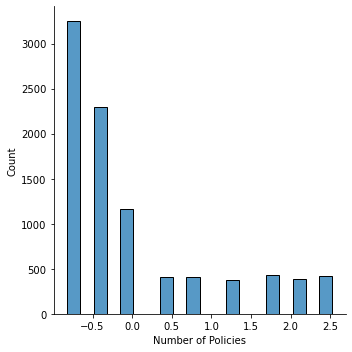

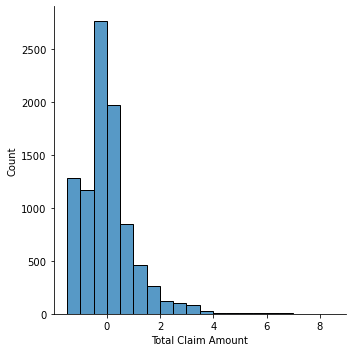

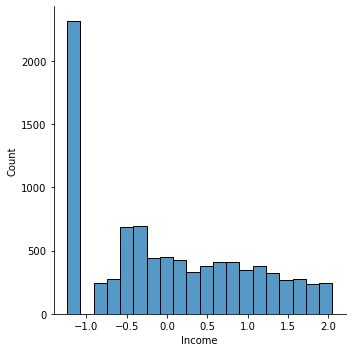

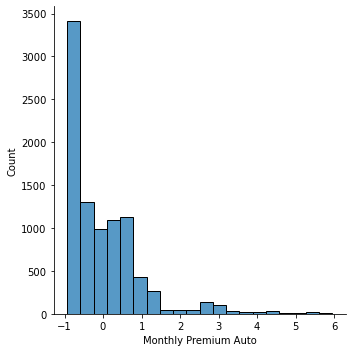

In [25]:
# Checking the visuals after normalization (stdset)

for column in stnorm_df.columns:
    sns.displot(stnorm_df[column], bins=20)
    plt.show()

# Start of Lab 6

In [26]:
# After normalizing the numerical values I will encode the categorical columns4
# categoricals = lab3_df.select_dtypes(include=object) <--- Already had this up in Lab 4

categoricals

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [27]:
categoricals = categoricals.drop(['Customer'], axis=1)

In [28]:
categoricals = categoricals.drop(['Effective To Date'], axis=1)

In [29]:
categoricals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [30]:
# Now that I've dropped the columns, I need to create a new column label list

cat_cols = categoricals.columns
cat_cols

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [31]:
# Which encoder should I use for each value?

# 'State' <-- no particular order to the values so I will apply One Hot Encoder

# 'Response' <-- no particular order to the values so I will apply One Hot Encoder

# 'Coverage' <-- basic < extended < premium - so I will use Label Encoding

# 'Education' <-- 'High School or Below' < 'College' < 'Bachelor' < 'Master' < 'Doctor' - so I will use Label Encoding

# 'EmploymentStatus' <-- no particular order to the values so I will apply One Hot Encoder

# 'Gender' <-- no particular order to the values so I will apply One Hot Encoder

# 'Location Code' <-- no particular order to the values so I will apply One Hot Encoder

# 'Marital Status' <-- no particular order to the values so I will apply One Hot Encoder

# 'Policy Type' <-- no particular order to the values so I will apply One Hot Encoder

# 'Policy' <-- This can be split into two columns "Corporate Policy" and "Personal Policy" which have a set order
#              L1 < L2 < L3 - so I will use Label Encoding

# 'Renew Offer Type' <-- Offer 1 < Offer 2 < Offer 3 < Offer 4 - so I will use Label Encoding

# 'Sales Channel' <-- no particular order to the values so I will apply One Hot Encoder

# 'Vehicle Class' <-- 2 Door < 4 Door < SUV < Lux SUV < Sports < Lux Car - so I will use Label Encoding

# 'Vehicle Size' <-- Small < Med < Large - so I will use Label Encoding


# So to sum up:


# One Hot Encoder

# State
# Response
# EmploymentStatus
# Gender
# Location Code
# Marital Status
# Policy Type
# Sales Channel


# Label Encoder

# Coverage
# Education
# Policy
# Renew Offer Type
# Vehicle Class
# Vehicle Size

In [32]:
# Create Dataframes to apply the right Encoders

# One Hot Encoder

categoricals_ohe_data = [categoricals["State"], categoricals["Response"], categoricals["EmploymentStatus"], categoricals["Gender"], categoricals["Location Code"], categoricals["Marital Status"], categoricals["Policy Type"], categoricals["Sales Channel"]]

categoricals_ohe_headers = ['State', 'Response', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Sales Channel']

categoricals_ohe = pd.concat(categoricals_ohe_data, axis=1, keys=categoricals_ohe_headers)


# Label Encoder

# Splitting the 'Policy' column into "Corporate Policy" and "Personal Policy"

categoricals['Corporate Policy'] = pd.np.where(categoricals.Policy.str.contains("Corporate L1"), "Corporate L1",
                   pd.np.where(categoricals.Policy.str.contains("Corporate L2"), "Corporate L2",
                   pd.np.where(categoricals.Policy.str.contains("Corporate L3"), "Corporate L3", "")))

categoricals['Personal Policy'] = pd.np.where(categoricals.Policy.str.contains("Personal L1"), "Personal L1",
                   pd.np.where(categoricals.Policy.str.contains("Personal L2"), "Personal L2",
                   pd.np.where(categoricals.Policy.str.contains("Personal L3"), "Personal L3", "")))

categoricals_le_data = [categoricals["Coverage"], categoricals["Education"], categoricals["Renew Offer Type"], categoricals["Vehicle Class"], categoricals["Vehicle Size"], categoricals["Corporate Policy"], categoricals["Personal Policy"]]

categoricals_le_headers = ['Coverage', 'Education', 'Renew Offer Type', 'Vehicle Class', 'Vehicle Size', 'Corporate Policy', 'Personal Policy']

categoricals_le = pd.concat(categoricals_le_data, axis=1, keys=categoricals_le_headers)


# Now I'll just drop the original Policy column so I don't duplicate the data and create a new list of column names

categoricals = categoricals.drop(['Policy'], axis=1)

cat_cols = categoricals.columns

display(categoricals)
display(categoricals_ohe)
display(categoricals_le)

<ipython-input-32-04f4f665231e>:16: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  categoricals['Corporate Policy'] = pd.np.where(categoricals.Policy.str.contains("Corporate L1"), "Corporate L1",
<ipython-input-32-04f4f665231e>:17: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(categoricals.Policy.str.contains("Corporate L2"), "Corporate L2",
<ipython-input-32-04f4f665231e>:18: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(categoricals.Policy.str.contains("Corporate L3"), "Corporate L3", "")))
<ipython-input-32-04f4f665231e>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  categoricals['Personal Policy'] = pd.np.w

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Corporate Policy,Personal Policy
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize,Corporate L3,
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize,,Personal L3
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize,,Personal L3
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize,Corporate L2,
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize,,Personal L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Offer2,Web,Four-Door Car,Medsize,,Personal L1
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,Corporate L3,
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Medsize,Corporate L2,
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Offer3,Branch,Four-Door Car,Large,,Personal L2


,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Sales Channel
0,Washington,No,Employed,F,Suburban,Married,Corporate Auto,Agent
1,Arizona,No,Unemployed,F,Suburban,Single,Personal Auto,Agent
2,Nevada,No,Employed,F,Suburban,Married,Personal Auto,Agent
3,California,No,Unemployed,M,Suburban,Married,Corporate Auto,Call Center
4,Washington,No,Employed,M,Rural,Single,Personal Auto,Agent
...,...,...,...,...,...,...,...,...
9129,California,No,Employed,M,Urban,Married,Personal Auto,Web
9130,California,Yes,Employed,F,Suburban,Divorced,Corporate Auto,Branch
9131,California,No,Unemployed,M,Suburban,Single,Corporate Auto,Branch
9132,California,No,Employed,M,Suburban,Married,Personal Auto,Branch


,Coverage,Education,Renew Offer Type,Vehicle Class,Vehicle Size,Corporate Policy,Personal Policy
0,Basic,Bachelor,Offer1,Two-Door Car,Medsize,Corporate L3,
1,Extended,Bachelor,Offer3,Four-Door Car,Medsize,,Personal L3
2,Premium,Bachelor,Offer1,Two-Door Car,Medsize,,Personal L3
3,Basic,Bachelor,Offer1,SUV,Medsize,Corporate L2,
4,Basic,Bachelor,Offer1,Four-Door Car,Medsize,,Personal L1
...,...,...,...,...,...,...,...
9129,Basic,Bachelor,Offer2,Four-Door Car,Medsize,,Personal L1
9130,Extended,College,Offer1,Four-Door Car,Medsize,Corporate L3,
9131,Extended,Bachelor,Offer1,Four-Door Car,Medsize,Corporate L2,
9132,Extended,College,Offer3,Four-Door Car,Large,,Personal L2


In [33]:
# One Hot Encoder

from sklearn.preprocessing import OneHotEncoder

onehot_encoded = pd.DataFrame()

for col in categoricals_ohe.columns:
    encoder = OneHotEncoder().fit(categoricals_ohe[[col]])
#     print(encoder.categories_)
    encoded = encoder.transform(categoricals_ohe[[col]]).toarray()
#     print(encoded)
    onehot_encoded_loop = pd.DataFrame(encoded,columns=encoder.categories_)
    onehot_encoded = pd.concat([onehot_encoded,onehot_encoded_loop], axis=1)

onehot_encoded.head()

# Couldn't firgure out how to use the .get_dummies/drop first function so I am deleting all non-essential columns manually

onehot_encoded = onehot_encoded.drop(['Arizona', 'No', 'Disabled', 'F', 'Rural', 'Divorced', 'Corporate Auto','Agent'], axis=1)

# State
# Arizona

# Response
# No

# EmploymentStatus
# Disabled

# Gender
# F

# Location Code
# Rural

# Marital Status
# Divorced

# Policy Type
# Corporate Auto

# Sales Channel
# Agent

onehot_encoded

C:\Users\joana\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,California,Nevada,Oregon,Washington,Yes,Employed,Medical Leave,Retired,Unemployed,M,Suburban,Urban,Married,Single,Personal Auto,Special Auto,Branch,Call Center,Web
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
# Label Enconder

from sklearn.preprocessing import LabelEncoder

# Label encoder only takes 1-d array as argument, so I need to split my categoricals_le dataframe
# (so as to avoid creating my own class/custom encoder)
# Then concatenate the results into a final dataframe

cov_le = categoricals_le.loc[:,'Coverage']
cov_le = cov_le.to_frame()

edu_le = categoricals_le.loc[:,'Education']
edu_le = edu_le.to_frame()

rot_le = categoricals_le.loc[:,'Renew Offer Type']
rot_le = rot_le.to_frame()

vec_le = categoricals_le.loc[:,'Vehicle Class']
vec_le = vec_le.to_frame()

ves_le = categoricals_le.loc[:,'Vehicle Size']
ves_le = ves_le.to_frame()

cpo_le = categoricals_le.loc[:,'Corporate Policy']
cpo_le = cpo_le.to_frame()

pep_le = categoricals_le.loc[:,'Personal Policy']
pep_le = pep_le.to_frame()

# Now run each column/array through the encoder

label_encoded_final = pd.DataFrame()

label_encoded_cov = LabelEncoder().fit(cov_le).transform(cov_le)
label_encoded_cov = pd.DataFrame(label_encoded_cov,columns=cov_le.columns)

label_encoded_edu = LabelEncoder().fit(edu_le).transform(edu_le)
label_encoded_edu = pd.DataFrame(label_encoded_edu,columns=edu_le.columns)

label_encoded_rot = LabelEncoder().fit(rot_le).transform(rot_le)
label_encoded_rot = pd.DataFrame(label_encoded_rot,columns=rot_le.columns)

label_encoded_vec = LabelEncoder().fit(vec_le).transform(vec_le)
label_encoded_vec = pd.DataFrame(label_encoded_vec,columns=vec_le.columns)

label_encoded_ves = LabelEncoder().fit(ves_le).transform(ves_le)
label_encoded_ves = pd.DataFrame(label_encoded_ves,columns=ves_le.columns)

label_encoded_cpo = LabelEncoder().fit(cpo_le).transform(cpo_le)
label_encoded_cpo = pd.DataFrame(label_encoded_cpo,columns=cpo_le.columns)

label_encoded_pep = LabelEncoder().fit(pep_le).transform(pep_le)
label_encoded_pep = pd.DataFrame(label_encoded_pep,columns=pep_le.columns)

# Now concatenate the returned arrays into the final dataframe

label_encoded_final = pd.concat([label_encoded_cov,label_encoded_edu,label_encoded_rot,label_encoded_vec,label_encoded_ves,label_encoded_cpo,label_encoded_pep], axis=1)


label_encoded_final.head()


C:\Users\joana\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Coverage,Education,Renew Offer Type,Vehicle Class,Vehicle Size,Corporate Policy,Personal Policy
0,0,0,0,5,1,3,0
1,1,0,2,0,1,0,3
2,2,0,0,5,1,0,3
3,0,0,0,3,1,2,0
4,0,0,0,0,1,0,1


In [35]:
# Concatenating both my normalized numerical dataframes and my encoded categorical dataframes into the actual final dataframe

# minmax_df
# stnorm_df
# onehot_encoded
# label_encoded_final

# lab6_X_df = pd.concat([minmax_df,stnorm_df,onehot_encoded,label_encoded_final], axis=1)
# lab6_X = lab6_X_df.drop(['Total Claim Amount'], axis=1)
# lab6_X

# # ONLY MINMAX
# lab6_X_df = pd.concat([minmax_df,onehot_encoded,label_encoded_final], axis=1)
# lab6_X = lab6_X_df.drop(['Total Claim Amount'], axis=1)
# lab6_X

# ONLY STANDARD
lab6_X_df = pd.concat([stnorm_df,onehot_encoded,label_encoded_final], axis=1)
lab6_X = lab6_X_df.drop(['Total Claim Amount'], axis=1)
lab6_X

,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Income,Monthly Premium Auto,"(California,)","(Nevada,)","(Oregon,)","(Washington,)","(Yes,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(M,)","(Suburban,)","(Urban,)","(Married,)","(Single,)","(Personal Auto,)","(Special Auto,)","(Branch,)","(Call Center,)","(Web,)",Coverage,Education,Renew Offer Type,Vehicle Class,Vehicle Size,Corporate Policy,Personal Policy
0,-0.762878,1.678099,-1.543287,-0.422250,-0.822648,0.612827,-0.703925,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,5,1,3,0
1,-0.149245,-0.208186,-0.217334,-0.422250,2.106160,-1.239617,0.022691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,2,0,1,0,3
2,0.710636,0.288205,-0.360680,-0.422250,-0.404247,0.365710,0.429596,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0,0,5,1,0,3
3,-0.052263,0.288205,0.606907,-0.422250,1.687759,-1.239617,0.371467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,3,1,2,0
4,-0.755575,-0.307465,-0.145661,-0.422250,-0.822648,0.203390,-0.587666,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,0.288205,1.466984,-0.422250,-0.404247,1.128558,-0.587666,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,1,0,1
9130,-0.714411,-0.108908,-0.719046,-0.422250,-0.822648,-0.528450,-0.413278,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1,3,0
9131,0.023135,-0.605299,-0.396517,2.873245,-0.404247,-1.239617,-0.238891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1,2,0
9132,-0.069935,1.876656,-1.614960,-0.422250,0.014154,-0.517356,0.080820,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,2,0,0,0,2


In [36]:
# # Train-Test Split

# lab6_y = lab6_X_df['Total Claim Amount']

# from sklearn.model_selection import train_test_split

# lab6_X_train, lab6_X_test, lab6_y_train, lab6_y_test = train_test_split(lab6_X, lab6_y, test_size=0.1, random_state=42)

# print(lab6_X_train.shape)
# print(lab6_X_test.shape)
# print(lab6_y_train.shape)
# print(lab6_y_test.shape)

In [37]:
# # Training the model

# from sklearn import linear_model
# from sklearn.metrics import mean_squared_error, r2_score

# lm = linear_model.LinearRegression()
# model = lm.fit(lab6_X_train,lab6_y_train)

# # Preliminary score

# from sklearn.metrics import r2_score

# predictions = lm.predict(lab6_X_train)
# r2_score(lab6_y_train, predictions)

In [38]:
# # Testing the model

# predictions = lm.predict(lab6_X_test)


In [39]:
# # Model Validation

# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import math

# r2_score(lab6_y_test, predictions)
# print('R2 : ')
# print(r2_score(lab6_y_test, predictions))

# mse = mean_squared_error(lab6_y_test, predictions)
# print('Mean Squared Error : ')
# print(mse)

# rmse = math.sqrt(mse)
# print('Mean Error: ')
# print(rmse)

# mae = mean_absolute_error(lab6_y_test, predictions)
# print('Mean Absolute Error: ')
# print(mse)

# Start of Lab 7

In [40]:
# Variables altered

# --> Removing Variables of Less Interest from sample, seen below
# According to the correlation matrix below, I might gain benefit in dropping the following columns from the model
# Policy
# Months Since Policy Inception
# Number of Policies
# These columns all hold a correlation to our target "Total Claim Amount"  equal or infeior to 1%
 
# correlations_matrix = lab6_X_df.corr()
# correlations_matrix

# --> Scaling the Numeric Values
# only using MinMax scaler
# only using Standard scaler


# Train-Test Split Ratio (Test Size)
# 0.05
# 0.3

In [41]:
# Dropping Necessary Columns Pre-Analysis

lab6_X=lab6_X.drop(["Months Since Policy Inception","Number of Policies","Corporate Policy","Personal Policy"], axis=1)

lab6_X

,Customer Lifetime Value,Months Since Last Claim,Number of Open Complaints,Income,Monthly Premium Auto,"(California,)","(Nevada,)","(Oregon,)","(Washington,)","(Yes,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(M,)","(Suburban,)","(Urban,)","(Married,)","(Single,)","(Personal Auto,)","(Special Auto,)","(Branch,)","(Call Center,)","(Web,)",Coverage,Education,Renew Offer Type,Vehicle Class,Vehicle Size
0,-0.762878,1.678099,-0.422250,0.612827,-0.703925,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,5,1
1,-0.149245,-0.208186,-0.422250,-1.239617,0.022691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,2,0,1
2,0.710636,0.288205,-0.422250,0.365710,0.429596,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0,0,5,1
3,-0.052263,0.288205,-0.422250,-1.239617,0.371467,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,3,1
4,-0.755575,-0.307465,-0.422250,0.203390,-0.587666,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,0.288205,-0.422250,1.128558,-0.587666,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,1
9130,-0.714411,-0.108908,-0.422250,-0.528450,-0.413278,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1
9131,0.023135,-0.605299,2.873245,-1.239617,-0.238891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
9132,-0.069935,1.876656,-0.422250,-0.517356,0.080820,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,2,0,0


In [53]:
# Train-Test Split Optimization

lab6_y = lab6_X_df['Total Claim Amount']

from sklearn.model_selection import train_test_split

lab6_X_train, lab6_X_test, lab6_y_train, lab6_y_test = train_test_split(lab6_X, lab6_y, test_size=0.5, random_state=42)

print(lab6_X_train.shape)
print(lab6_X_test.shape)
print(lab6_y_train.shape)
print(lab6_y_test.shape)

# Training the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
model = lm.fit(lab6_X_train,lab6_y_train)

# Preliminary score

from sklearn.metrics import r2_score

predictions = lm.predict(lab6_X_train)
r2_score(lab6_y_train, predictions)

# Testing the model

predictions = lm.predict(lab6_X_test)


(4567, 29)
(4567, 29)
(4567,)
(4567,)


In [54]:
# Model Validation

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

r2_score(lab6_y_test, predictions)
print('R2 : ')
print(r2_score(lab6_y_test, predictions))

mse = mean_squared_error(lab6_y_test, predictions)
print('Mean Squared Error : ')
print(mse)

rmse = math.sqrt(mse)
print('Mean Error: ')
print(rmse)

mae = mean_absolute_error(lab6_y_test, predictions)
print('Mean Absolute Error: ')
print(mse)

R2 : 
0.7694568685336214
Mean Squared Error : 
0.22474704312966404
Mean Error: 
0.4740749340870745
Mean Absolute Error: 
0.22474704312966404


In [44]:
# Conclusions

# --> Removing Variables ?
# There was little difference when removing features


# --> Scaling the Numeric Values
# only using MinMax scaler
# only using Standard scaler
# both depending on category
# Out of all the iterations, relying only on the standard scaler produced a slightly lower mse/rmse


# Train-Test Split Ratio (Test Size)
# 0.05
# 0.1
# 0.5
# Out of all iterations, having a higher test sample produced better results